In [1]:
import keras
print(keras.__version__)

3.10.0


In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense

 

Load the Dataset

In [ ]:
#"E:\handwrittenDigits\Data\mnist_test.csv"

tr1 = pd.read_csv("E:/handwrittenDigits/Data/mnist_train.csv")
te1 = pd.read_csv("E:/handwrittenDigits/Data/mnist_test.csv")

df = pd.concat([tr1, te1])

print(df.shape)

In [76]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y = df['label'].values 
print(y.shape)
#x = df.loc[:, df.columns != 'label']

x = df.drop('label', axis=1).values.reshape(-1, 28, 28)
print(x.shape)

(70000,)
(70000, 28, 28)


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [79]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(49000, 28, 28) (49000,)
(21000, 28, 28) (21000,)


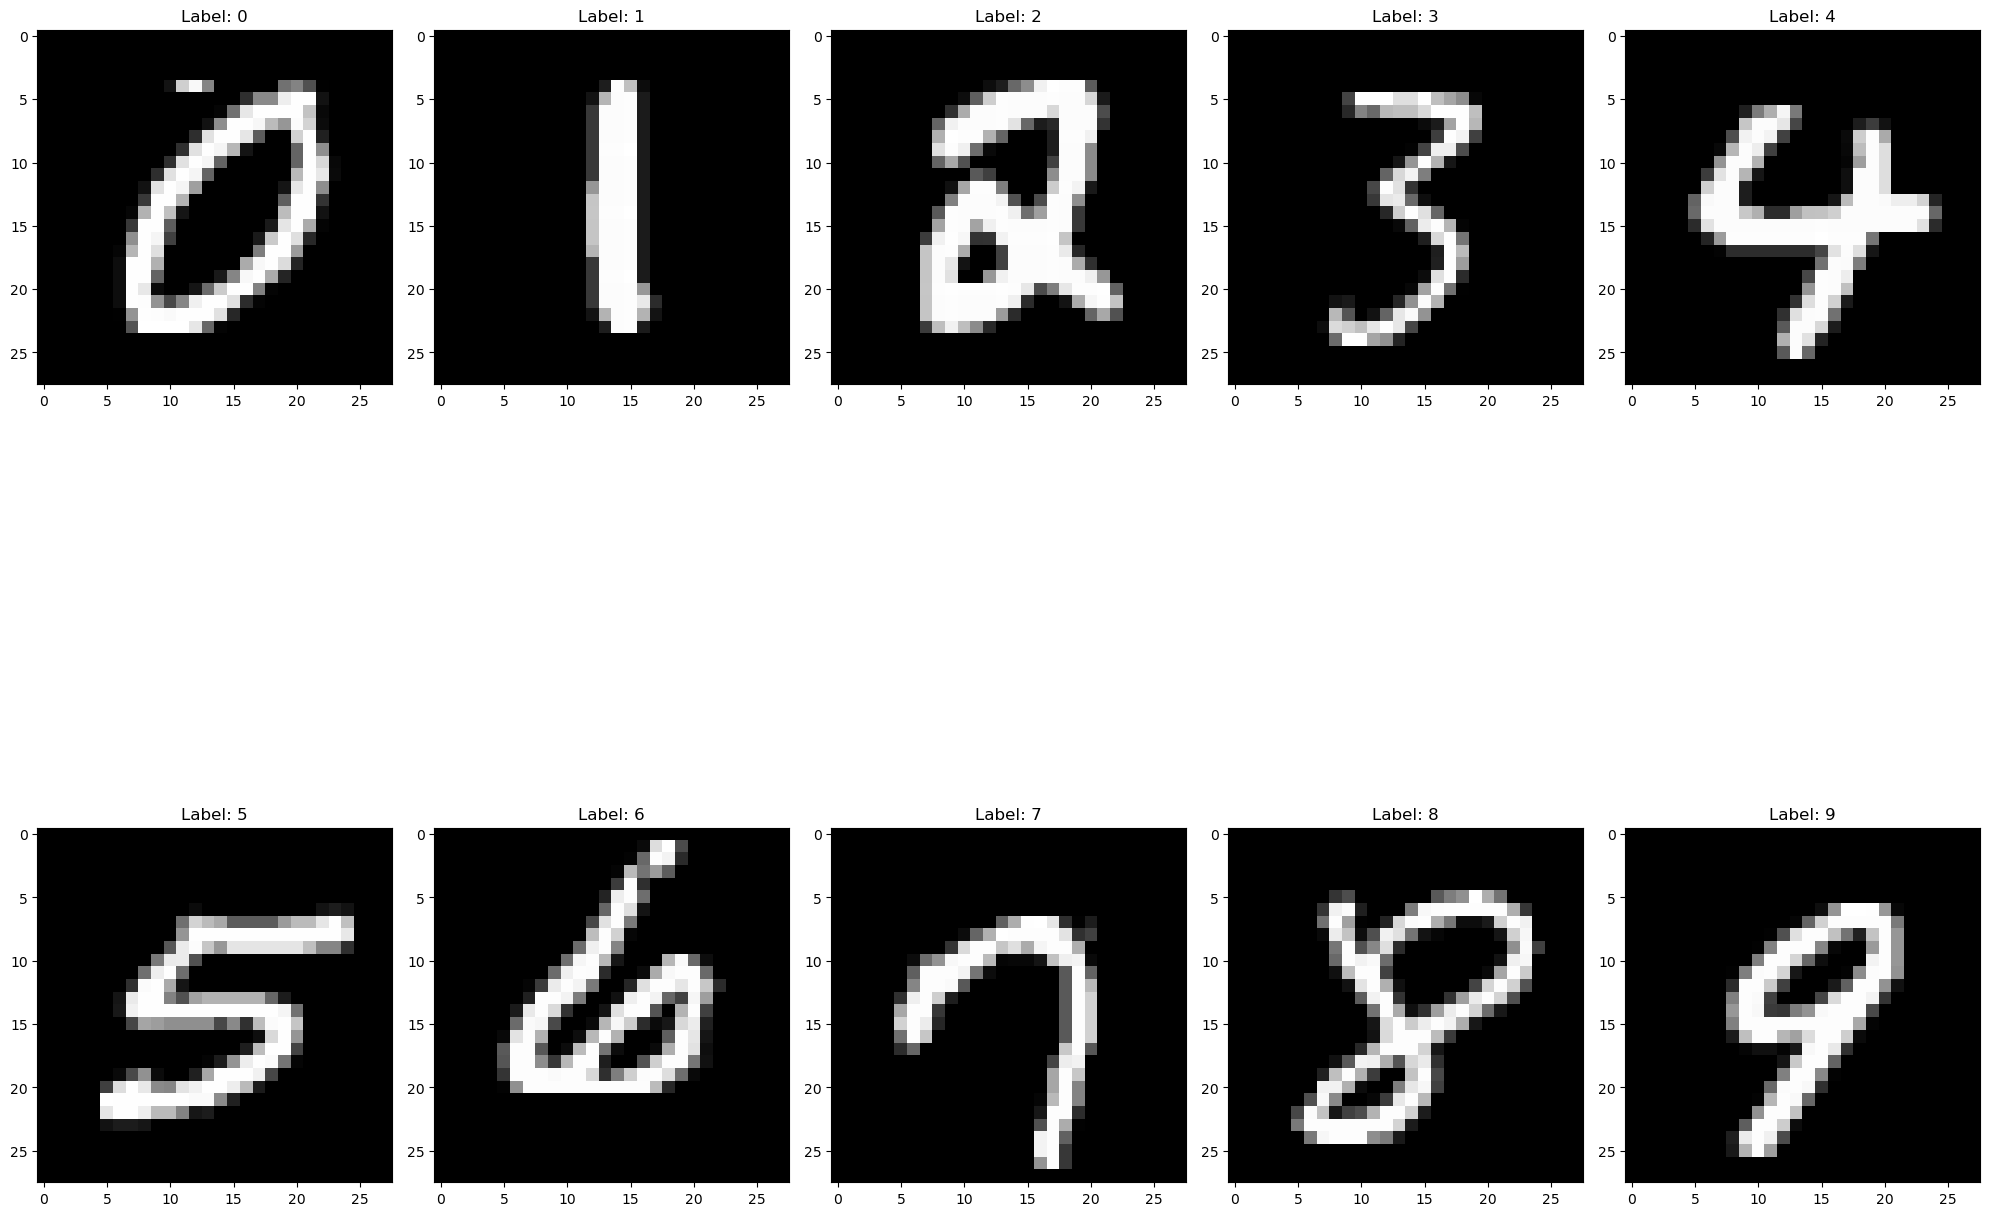

In [80]:
plt.figure(figsize=(20,20))

for digit in range(0,10):
    i = np.where(y==digit)[0]
    r = np.random.choice(i)
    plt.subplot(2,5, digit+1)
    plt.imshow(x[r], cmap='gray')
    plt.title(f'Label: {digit}')
plt.tight_layout()
plt.show()

In [83]:
y_train.shape

(49000,)

In [85]:
#to convert each digit into a 1d vector
d = 10
y_train = keras.utils.to_categorical(y_train, d)
y_test = keras.utils.to_categorical(y_test, d)

for i in range(10):
    print(y_train[i])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [86]:
###lmaoaooaoao (49000, 10, 10, 10, 10) HOW THE HELLY

In [89]:
#time for normalisation

x_train = x_train/255.5
x_test = x_test/255.5

print(x_train.shape)
print(x_test.shape)

(49000, 28, 28)
(21000, 28, 28)


In [90]:
#28, 28 nadaaa we need 784, so flatten!!!!!!!
#trallalero = x_train
#trallala = x_test

x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

print(x_train.shape)
print(x_test.shape)

(49000, 784)
(21000, 784)


In [37]:
#it's modelling time babyyyyy

In [45]:
import random
activation_function = ['relu', 'sigmoid', 'tanh']
hide_and_seek=[2,3]
nodes1=[100,150]
nodes2=[150,100]

models=[]

for i in range(0,3):
    for layers in range(2):
        print("activation:", activation_function[i])
        model=Sequential()
        model.add(Dense(input_shape = (784,), units=784,  activation=activation_function[i]))
        for ii in range(layers):
            model.add(Dense(units=nodes1[ii], activation= activation_function[i]))
        model.add(Dense(units=10, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        models.append(model)
        model.summary()
        print()

for i in range(0,3):
    for layers in range(2):
        print("activation:", activation_function[i])
        model=Sequential()
        model.add(Dense(input_shape = (784,), units=784,  activation=activation_function[i]))
        for ii in range(layers):
            model.add(Dense(units=nodes2[ii], activation= activation_function[i]))
        model.add(Dense(units=10, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        models.append(model)
        model.summary()
        print()

for i in range(0,3):
    custom_activation = random.choice(activation_function)
    print("activation:", custom_activation)
    model = Sequential() 
    
    model.add(Dense(input_shape = (784,), units=784,  activation=custom_activation))
    l1 = random.randint(70,120)
    l2 = 150 - l1

    model.add(Dense(units=l1, activation=custom_activation))
    model.add(Dense(units=l1, activation=custom_activation))

    model.add(Dense(units=10,activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    models.append(model)
    model.summary()
    print()

activation: relu


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_89 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_101 (Dense)                    │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734,700 (2.80 MB)

 Trainable params: 734,700 (2.80 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)                    │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_106 (Dense)                    │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734,700 (2.80 MB)

 Trainable params: 734,700 (2.80 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)                    │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734,700 (2.80 MB)

 Trainable params: 734,700 (2.80 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)                    │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 71)                  │          55,735 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 71)                  │           5,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 10)                  │             720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 677,007 (2.58 MB)

 Trainable params: 677,007 (2.58 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)                    │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 103)                 │          80,855 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 103)                 │          10,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 10)                  │           1,040 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 708,047 (2.70 MB)

 Trainable params: 708,047 (2.70 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_122 (Dense)                    │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 73)                  │          57,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 73)                  │           5,402 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 10)                  │             740 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 678,887 (2.59 MB)

 Trainable params: 678,887 (2.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10

for i in range(len(models)):
    print("fit:",i+1)
    models[i].fit(x=x_train, y=y_train, epochs=epochs)
    print()

fit: 1
Epoch 1/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9875 - loss: 0.0495
Epoch 2/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9953 - loss: 0.0151
Epoch 3/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9969 - loss: 0.0101
Epoch 4/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9968 - loss: 0.0100
Epoch 5/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9967 - loss: 0.0094
Epoch 6/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9983 - loss: 0.0058
Epoch 7/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9966 - loss: 0.0097
Epoch 8/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9979 - loss: 0.0064
Epoch 9/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9979 - loss: 0.0055
Epoch 10/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9982 - loss: 0.0050

fit: 2
Epoch 1/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9876 - loss: 0.0487
Epoc

In [49]:
print(x_test.shape,y_test.shape)

(49000, 336) (21000, 10)


In [97]:
tloss =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
taccuracy =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(models)):
    tloss[i], taccuracy[i] = models[i].evaluate(x_test, y_test)
    print("loss for model {} : {}, accuracy for model {} : {}".format(i+1, tloss[i], i+1, taccuracy[i]))
    print()

657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9909 - loss: 0.0377
loss for model 1 : 0.03972756862640381, accuracy for model 1 : 0.9903333187103271

657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9882 - loss: 0.0503
loss for model 2 : 0.04609407112002373, accuracy for model 2 : 0.9887619018554688

657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9901 - loss: 0.0344
loss for model 3 : 0.0339704193174839, accuracy for model 3 : 0.9903809428215027

657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9924 - loss: 0.0274
loss for model 4 : 0.029472583904862404, accuracy for model 4 : 0.9923809766769409

657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9883 - loss: 0.0489
loss for model 5 : 0.045128073543310165, accuracy for model 5 : 0.9886666536331177

657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9805 - loss: 0.0610
loss for model 6 : 0.060584988445043564, accuracy for model 6 : 0.9810000061988831

657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accurac

In [107]:
predict_y = []
preditct_y_classes = []

for i,model in enumerate(models):
    print(f"Model:{i+1}")
    yp = model.predict(x_test,verbose=1)
    preditct_y_class = np.argmax(yp,axis=1)

    predict_y.append(yp)
    preditct_y_classes.append(preditct_y_class)

    print(predict_y)
    print(preditct_y_classes)
    print()

Model:1
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
[array([[1.0000000e+00, 2.9010356e-22, 2.0991379e-17, ..., 8.9676794e-14,
        3.5058487e-23, 2.5142084e-17],
       [2.3472718e-20, 1.0406342e-13, 4.5276046e-15, ..., 5.5200214e-15,
        3.5280617e-10, 2.2470188e-12],
       [4.1148070e-17, 1.0277258e-21, 1.4341611e-16, ..., 2.1157240e-08,
        3.7051726e-09, 1.0000000e+00],
       ...,
       [2.0989611e-10, 3.1214391e-08, 4.7717673e-13, ..., 1.0115741e-05,
        5.8481182e-06, 9.9997723e-01],
       [4.4855328e-13, 1.5540151e-14, 1.5542982e-16, ..., 7.3047491e-16,
        2.6309969e-08, 6.7849093e-08],
       [1.0000000e+00, 1.2411561e-27, 6.2315443e-15, ..., 1.1098276e-18,
        8.6257329e-17, 2.6289175e-22]], dtype=float32)]
[array([0, 3, 9, ..., 9, 5, 0], dtype=int64)]

Model:2
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
[array([[1.0000000e+00, 2.9010356e-22, 2.0991379e-17, ..., 8.9676794e-14,
        3.5058487e-23, 2.5142084e-17],
       [2.3472718e-20, 1.0406342e-13, 4.

Model 1: Predicted = 3, True = 3


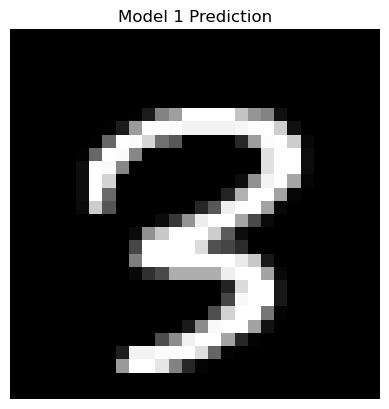

Model 2: Predicted = 0, True = 0


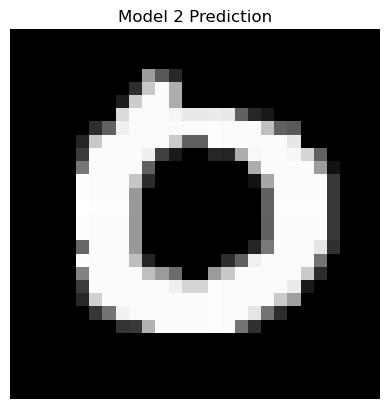

Model 3: Predicted = 3, True = 3


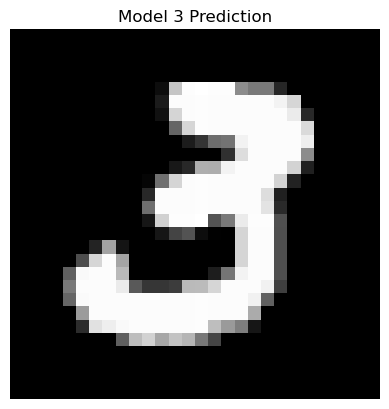

Model 4: Predicted = 1, True = 1


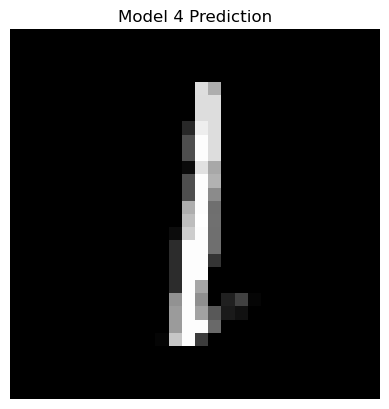

Model 5: Predicted = 1, True = 1


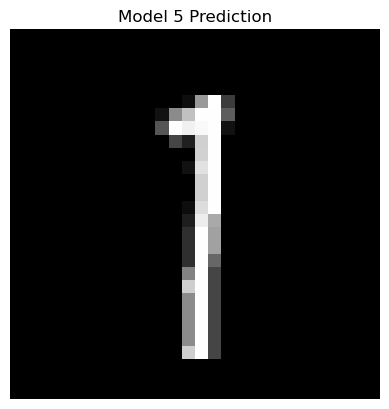

Model 6: Predicted = 8, True = 8


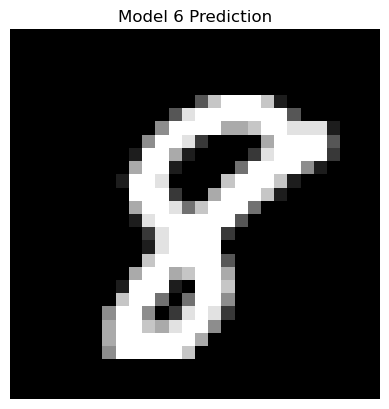

Model 7: Predicted = 4, True = 4


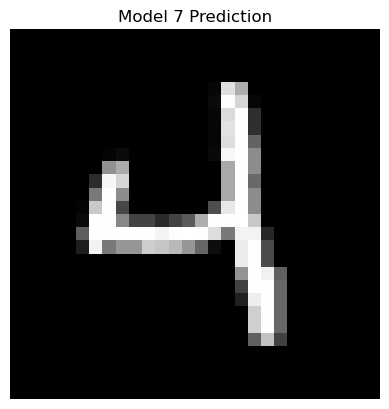

Model 8: Predicted = 6, True = 6


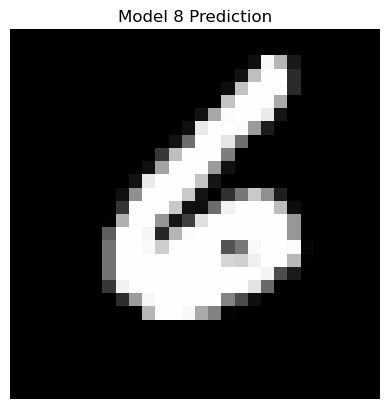

Model 9: Predicted = 8, True = 8


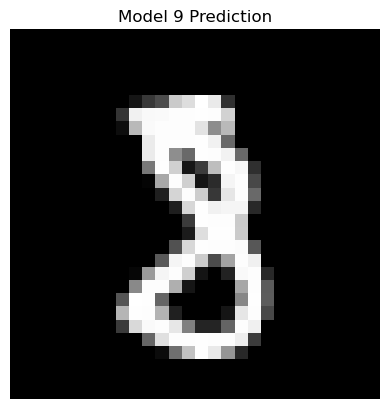

Model 10: Predicted = 9, True = 9


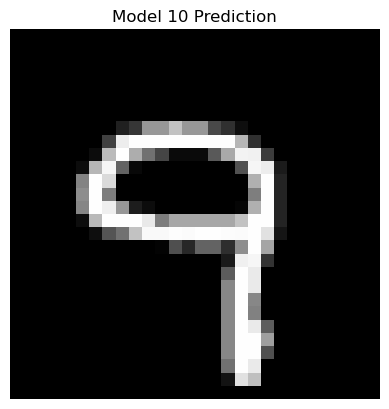

Model 11: Predicted = 3, True = 3


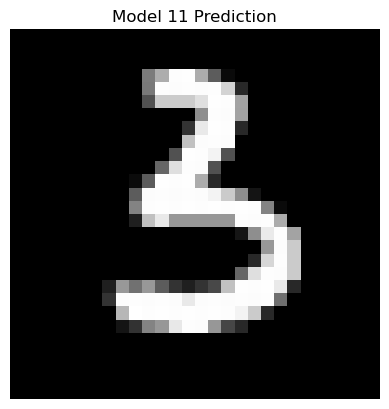

Model 12: Predicted = 1, True = 1


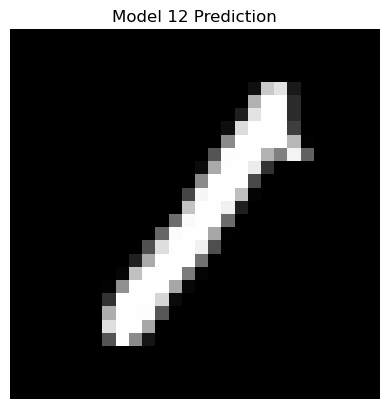

Model 13: Predicted = 1, True = 1


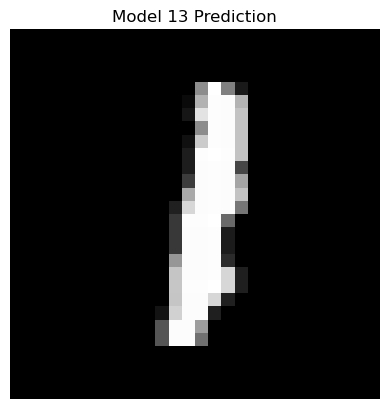

Model 14: Predicted = 2, True = 2


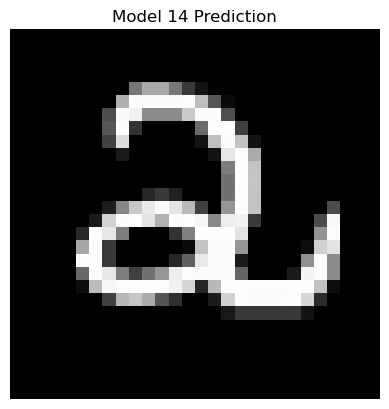

Model 15: Predicted = 4, True = 4


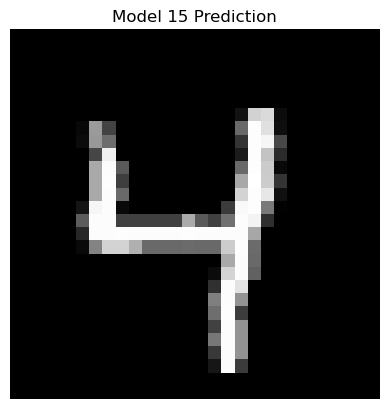

In [113]:
for i, model in enumerate(models):
    rand_idx = np.random.randint(len(x_test))

    img = x_test[rand_idx].reshape(28, 28)
    true_label = np.argmax(y_test[rand_idx])

    pred_label = preditct_y_classes[i][rand_idx]

    print(f"Model {i + 1}: Predicted = {pred_label}, True = {true_label}")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Model {i+1} Prediction")
    plt.show()

In [117]:
sorted_models = sorted(zip(model_names, taccuracy), key=lambda x: x[1], reverse=True)
for name, acc in sorted_models:
    print(f"{name}: {acc:.4f}")

Model 7: 0.9934
Model 4: 0.9924
Model 8: 0.9912
Model 9: 0.9910
Model 11: 0.9908
Model 3: 0.9904
Model 1: 0.9903
Model 10: 0.9902
Model 15: 0.9892
Model 14: 0.9889
Model 2: 0.9888
Model 5: 0.9887
Model 13: 0.9861
Model 12: 0.9822
Model 6: 0.9810


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
predicted digit: 3


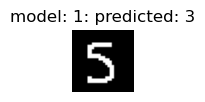

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
predicted digit: 5


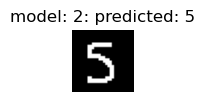

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
predicted digit: 5


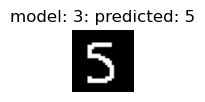

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
predicted digit: 5


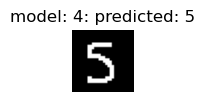

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicted digit: 5


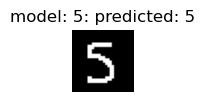

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
predicted digit: 5


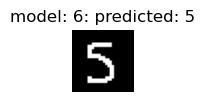

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
predicted digit: 5


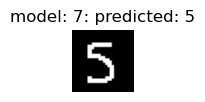

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
predicted digit: 5


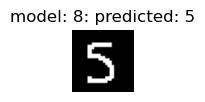

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
predicted digit: 5


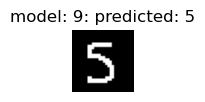

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
predicted digit: 5


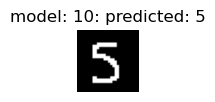

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
predicted digit: 5


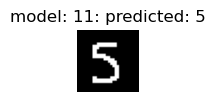

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
predicted digit: 5


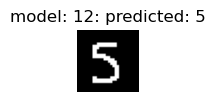

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
predicted digit: 5


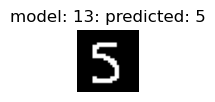

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
predicted digit: 5


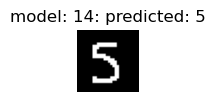

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
predicted digit: 5


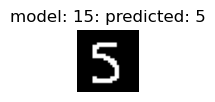

In [175]:
#using model 7 lets predict our own image
from PIL import Image

image_path = "C:/Users/Dell/Downloads/pixil-frame-0 (2).png"
img = Image.open(image_path).convert('L')

img=img.resize((28,28))

img_arr = np.array(img)

img_arr = img_arr/255.0

img_arr = (img_arr > 0.3).astype(float)

img_arr = img_arr.reshape(1, 784)

for i in range(len(models)):
    pred = models[i].predict(img_arr)
    
    pred_class = np.argmax(pred)
    
    print("predicted digit:",pred_class)
    plt.figure(figsize=(4,4))
    plt.subplot(2,5,digit+1)
   
    plt.imshow(img_arr.reshape(28,28), cmap='gray')
    plt.title(f"model: {i+1}: predicted: {pred_class}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [177]:

for i, prob in enumerate(pred[0]):
    print(f"Digit {i}: {prob:.4f}")


Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0498
Digit 4: 0.0000
Digit 5: 0.9495
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0007
